# Main Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from matplotlib.ticker import MultipleLocator
import re
import os

# import data
cb_10x = os.path.join("..", "clean-files-ul", "aggr", "agg-cb-10.csv")
cf_10x = os.path.join("..", "clean-files-ul", "aggr", "agg-cf-10.csv")
cb_5x = os.path.join("..", "clean-files-ul", "aggr", "agg-cb-5.csv")
cf_5x = os.path.join("..", "clean-files-ul", "aggr", "agg-cf-5.csv")
cb_1x = os.path.join("..", "clean-files-ul", "aggr", "agg-cb-1.csv")
cf_1x = os.path.join("..", "clean-files-ul", "aggr", "agg-cf-1.csv")

# Calculations for every file

#### 1x Scenarios

In [3]:
# Read content of the file
df_cb_1 = pd.read_csv(cb_1x)
df_cf_1 = pd.read_csv(cf_1x)

#### 5x Scenarios

In [4]:
def read_data_by_ue(csv_path): 
  df = pd.read_csv(csv_path)

  dfs = {}

  for ue_id, group in df.groupby("UE_ID"):
    df_ue = group.sort_values("Time_ms").reset_index(drop=True)
    df_ue["Rolling Avg (Mbps)"] = df_ue["Mean_Throughput"].rolling(window=5, min_periods=1).mean()
    dfs[ue_id] = df_ue
  
  return dfs

dfs_cb_5 = read_data_by_ue(cb_5x)
dfs_cf_5 = read_data_by_ue(cf_5x)

#### 10x Scenarios

In [5]:
def read_data_by_ue(csv_path): 
  df = pd.read_csv(csv_path)

  dfs = {}

  for ue_id, group in df.groupby("UE_ID"):
    df_ue = group.sort_values("Time_ms").reset_index(drop=True)
    df_ue["Rolling Avg (Mbps)"] = df_ue["Mean_Throughput"].rolling(window=5, min_periods=1).mean()
    dfs[ue_id] = df_ue
  
  return dfs

dfs_cb_10 = read_data_by_ue(cb_10x)
dfs_cf_10 = read_data_by_ue(cf_10x)

# Behavior Graphics 

## 1X Scenarios

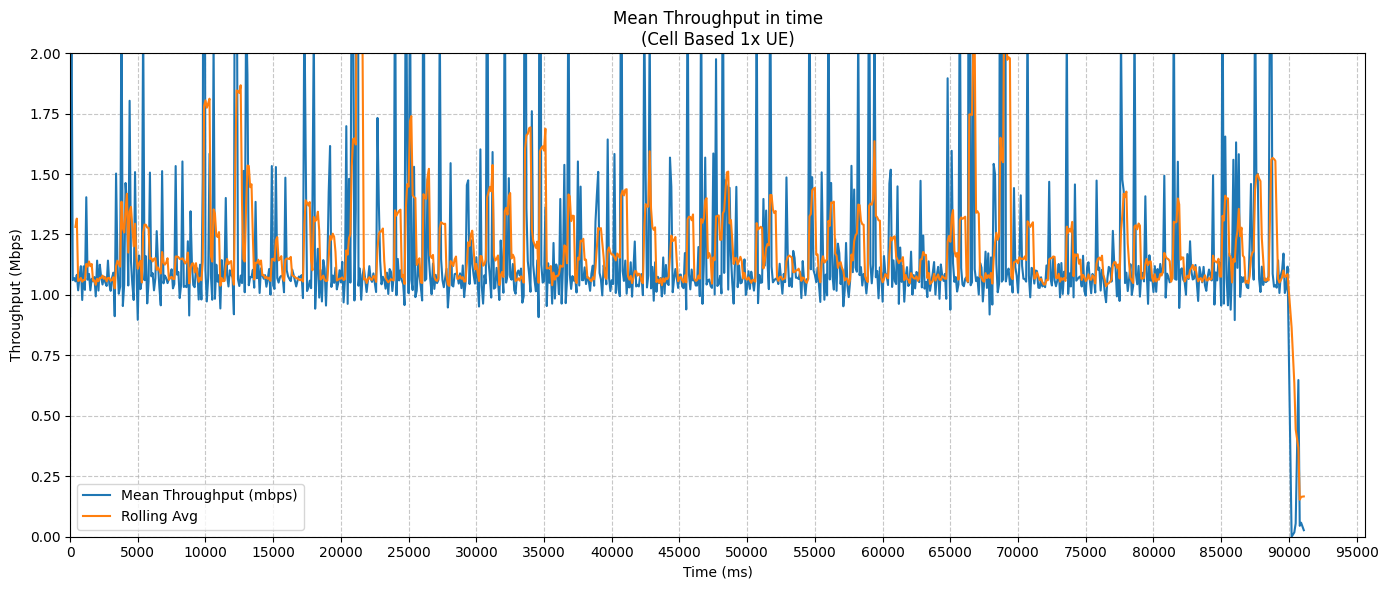

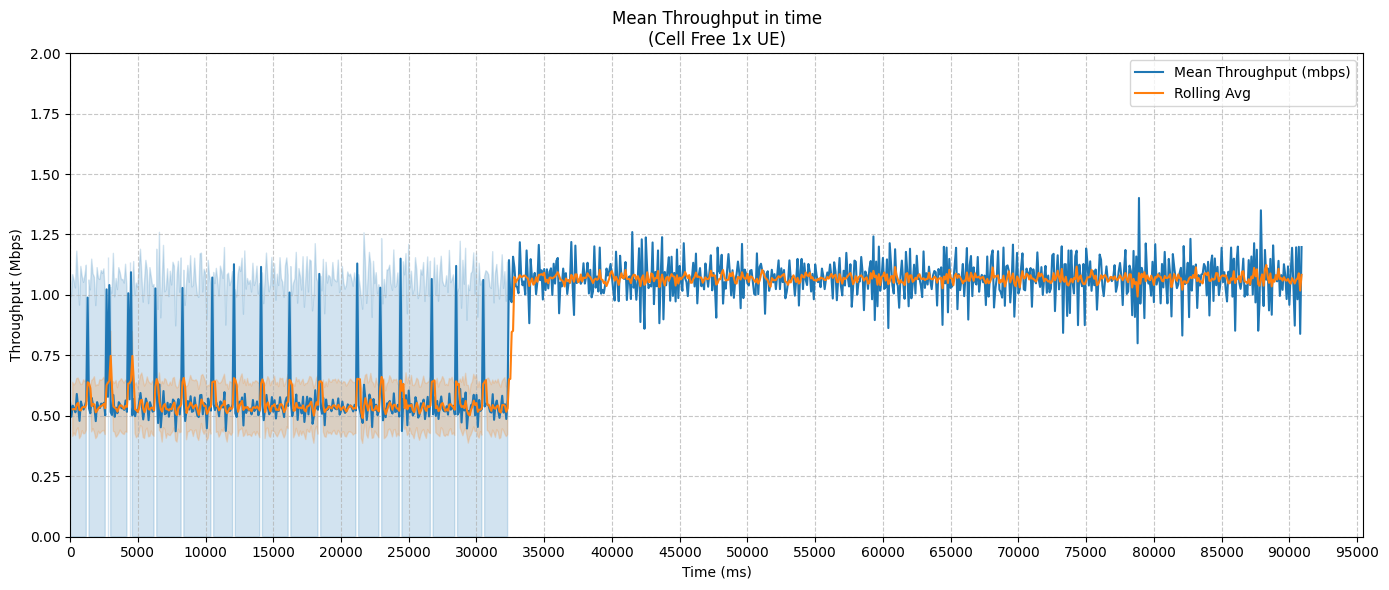

In [6]:
# Round of throughput values to 3 decimal places
df_cb_1["Mean_Throughput"] = df_cb_1["Mean_Throughput"].round(3)
# Calculate rolling average with a window of 5
df_cb_1["Rolling Avg (Mbps)"] = df_cb_1["Mean_Throughput"].rolling(window=5).mean()

# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
sns.lineplot(x="Time_ms", y="Mean_Throughput", data=df_cb_1, label="Mean Throughput (mbps)")
sns.lineplot(x="Time_ms", y="Rolling Avg (Mbps)", data=df_cb_1, label="Rolling Avg")
plt.title("Mean Throughput in time\n(Cell Based 1x UE)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.legend()
plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Round of throughput values to 3 decimal places
df_cf_1["Mean_Throughput"] = df_cf_1["Mean_Throughput"].round(3)
# Calculate rolling average with a window of 5
df_cf_1["Rolling Avg (Mbps)"] = df_cf_1["Mean_Throughput"].rolling(window=5).mean()

# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
sns.lineplot(x="Time_ms", y="Mean_Throughput", data=df_cf_1, label="Mean Throughput (mbps)")
sns.lineplot(x="Time_ms", y="Rolling Avg (Mbps)", data=df_cf_1, label="Rolling Avg")
plt.title("Mean Throughput in time\n(Cell Free 1x UE)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.legend()

plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
print(df_cb_1["Mean_Throughput"].describe())
print(df_cf_1["Mean_Throughput"].describe())

count    907.000000
mean       1.191353
std        0.445191
min        0.000000
25%        1.036000
50%        1.073000
75%        1.129000
max        5.880000
Name: Mean_Throughput, dtype: float64
count    1215.000000
mean        0.799190
std         0.468691
min         0.000000
25%         0.000000
50%         1.039000
75%         1.098500
max         1.401000
Name: Mean_Throughput, dtype: float64


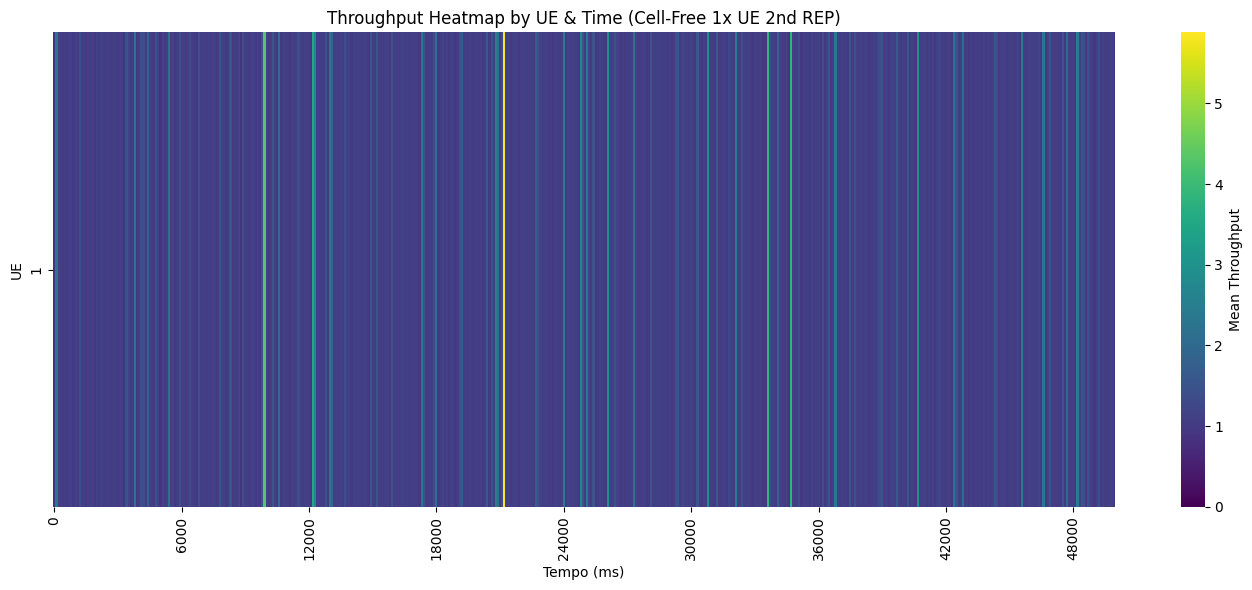

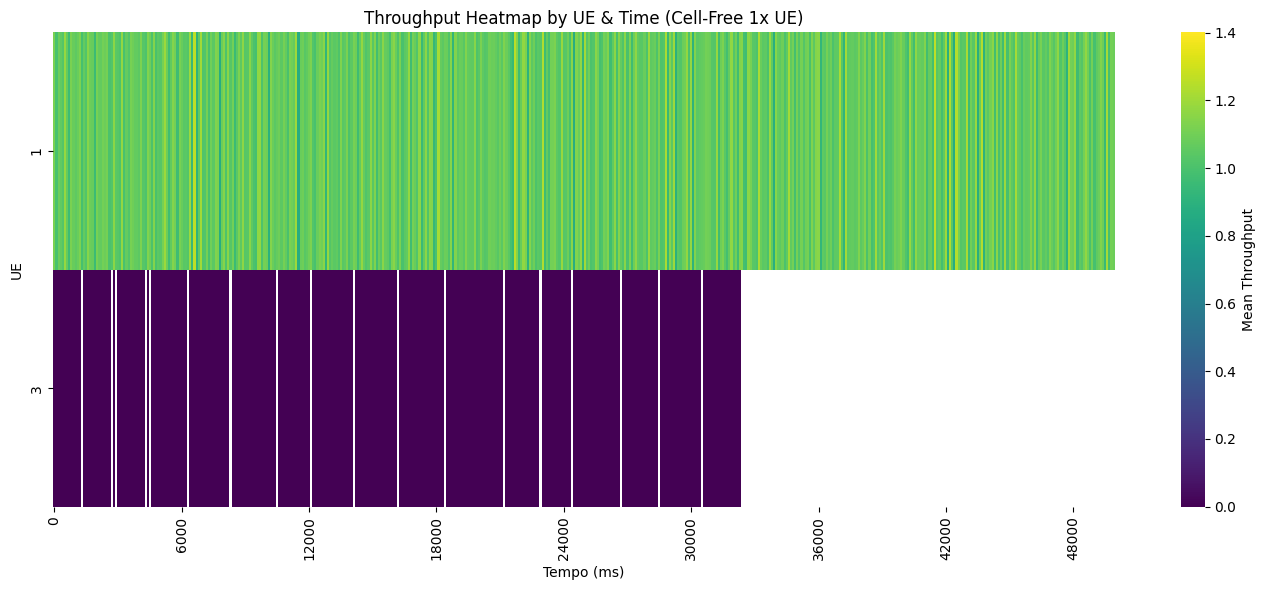

In [6]:
heat_cb = df_cb_1.pivot(index="UE_ID", columns="Time_ms", values="Mean_Throughput")
heat_cf = df_cf_1.pivot(index="UE_ID", columns="Time_ms", values="Mean_Throughput")

# Plot Cell-Based
plt.figure(figsize=(14, 6))
sns.heatmap(heat_cb, cmap="viridis", cbar_kws={'label': 'Mean Throughput'})
plt.title("Throughput Heatmap by UE & Time (Cell-Free 1x UE 2nd REP)")
plt.xlabel("Tempo (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.tight_layout()
plt.xlim(0,500)
plt.show()

# Plot Cell-Free
plt.figure(figsize=(14, 6))
sns.heatmap(heat_cf, cmap="viridis", cbar_kws={'label': 'Mean Throughput'})
plt.title("Throughput Heatmap by UE & Time (Cell-Free 1x UE)")
plt.xlabel("Tempo (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.xlim(0,500)
plt.tight_layout()
plt.show()

## 5X Scenarios

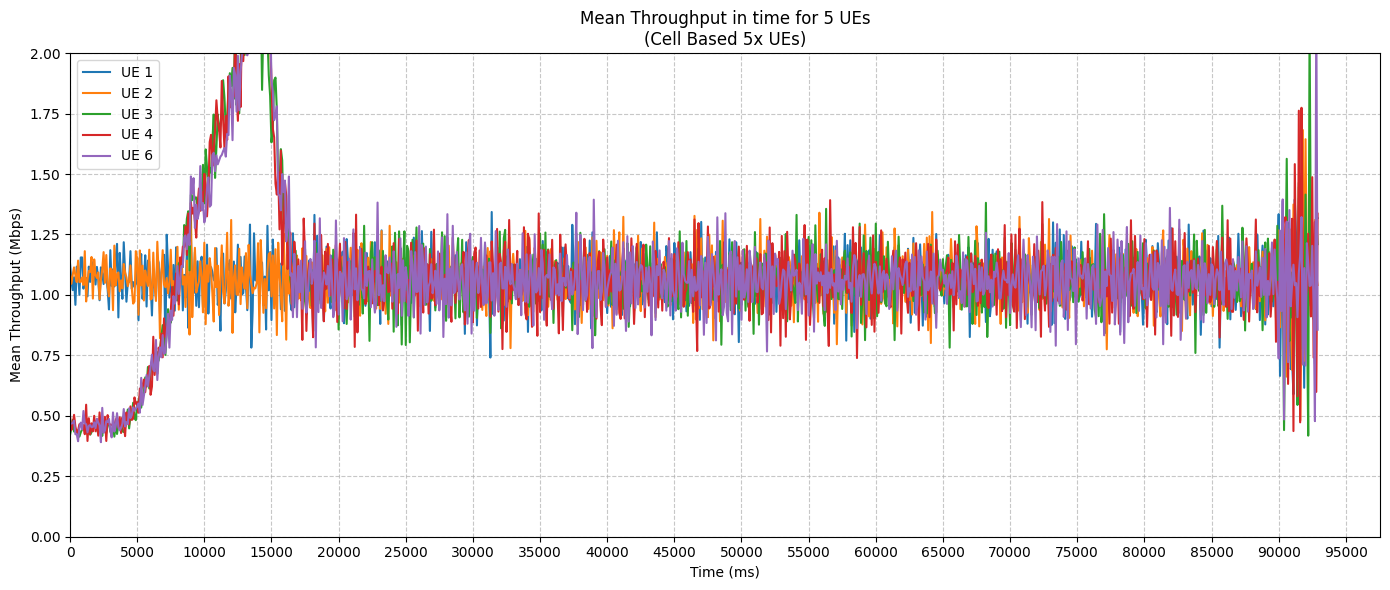

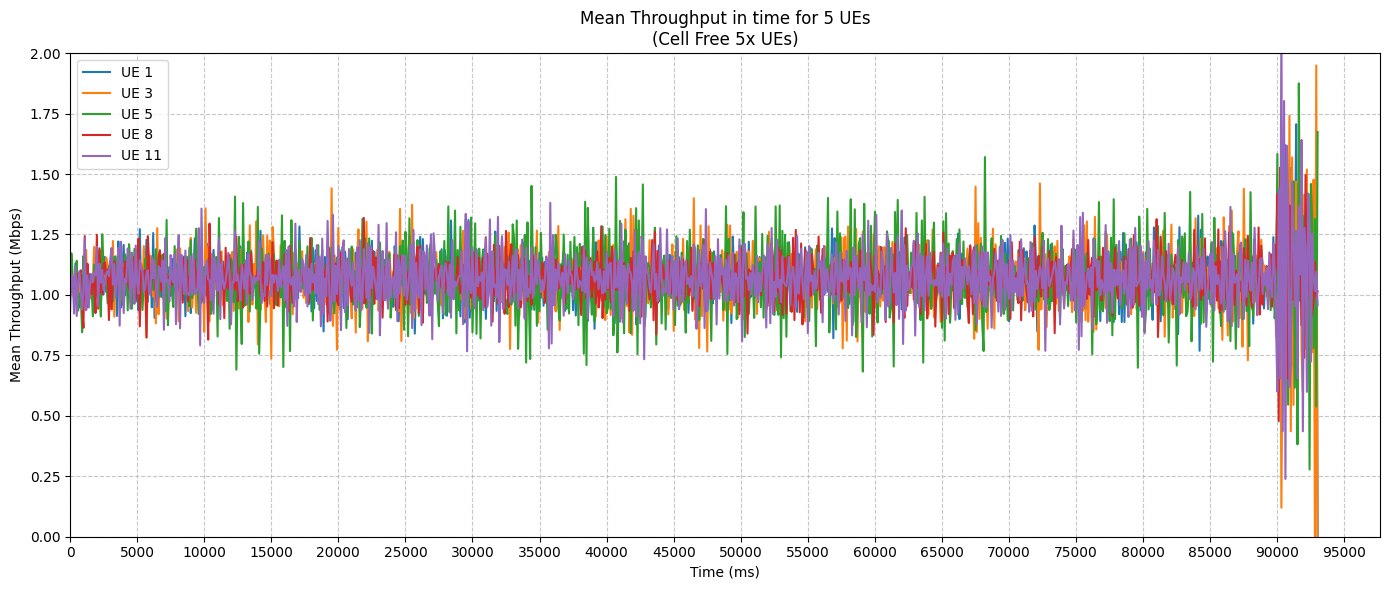

In [42]:
plt.figure(figsize=(14, 6))

# Graphic of Throughput and Rolling Average
for ue, df in dfs_cb_5.items():
    dfs_cb_5[ue]["Mean_Throughput"] = dfs_cb_5[ue]["Mean_Throughput"].round(3)

    sns.lineplot(x="Time_ms", y="Mean_Throughput", data=df, label=f"UE {ue}")

plt.title("Mean Throughput in time for 5 UEs\n(Cell Based 5x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("Mean Throughput (Mbps)")
plt.grid(True)
plt.legend()

plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 6))

# Graphic of Throughput and Rolling Average
for ue, df in dfs_cf_5.items():
    dfs_cf_5[ue]["Mean_Throughput"] = dfs_cf_5[ue]["Mean_Throughput"].round(3)

    sns.lineplot(x="Time_ms", y="Mean_Throughput", data=df, label=f"UE {ue}")

plt.title("Mean Throughput in time for 5 UEs\n(Cell Free 5x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("Mean Throughput (Mbps)")
plt.grid(True)
plt.legend()

plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [18]:
df_cb_5 = pd.read_csv(cb_5x)
df_cf_5 = pd.read_csv(cf_5x)

print(df_cb_5["Mean_Throughput"].describe())
print(df_cf_5["Mean_Throughput"].describe())

count    4650.000000
mean        1.070289
std         0.233903
min         0.391193
25%         0.982282
50%         1.060701
75%         1.138828
max         2.586306
Name: Mean_Throughput, dtype: float64
count    4655.000000
mean        1.067742
std         0.127679
min         0.000000
25%         0.998039
50%         1.065986
75%         1.137435
max         2.153980
Name: Mean_Throughput, dtype: float64


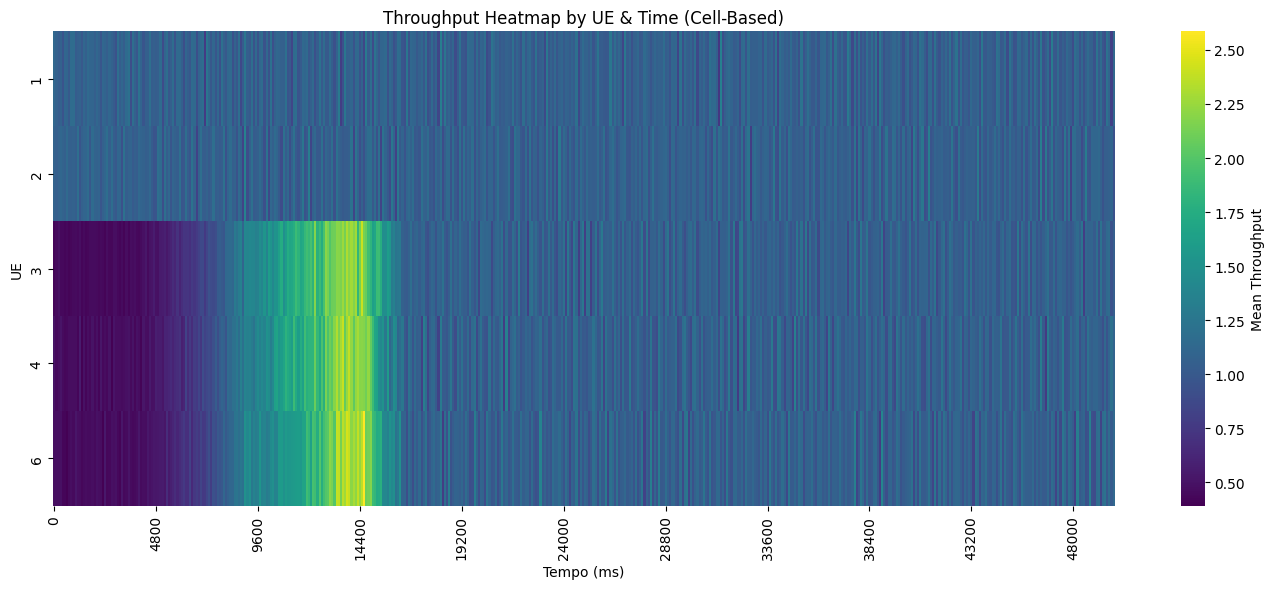

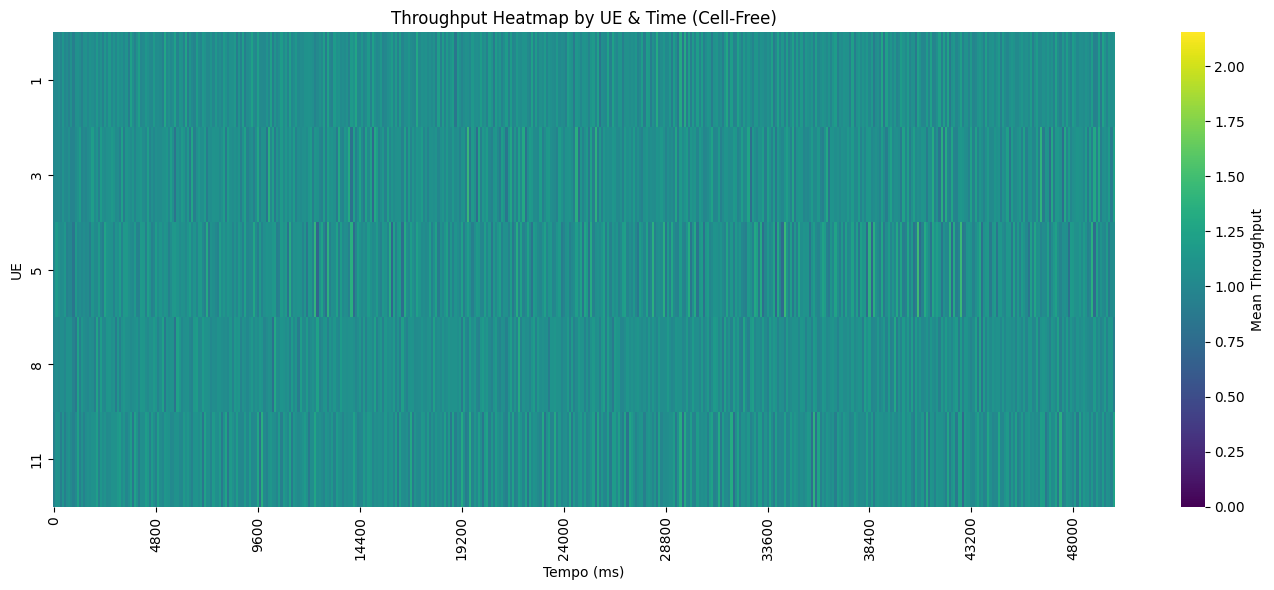

In [19]:
heat_cb = df_cb_5.pivot(index="UE_ID", columns="Time_ms", values="Mean_Throughput")
heat_cf = df_cf_5.pivot(index="UE_ID", columns="Time_ms", values="Mean_Throughput")

# Plot Cell-Based
plt.figure(figsize=(14, 6))
sns.heatmap(heat_cb, cmap="viridis", cbar_kws={'label': 'Mean Throughput'})
plt.title("Throughput Heatmap by UE & Time (Cell-Based)")
plt.xlabel("Tempo (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.tight_layout()
plt.xlim(0,500)
plt.show()

# Plot Cell-Free
plt.figure(figsize=(14, 6))
sns.heatmap(heat_cf, cmap="viridis", cbar_kws={'label': 'Mean Throughput'})
plt.title("Throughput Heatmap by UE & Time (Cell-Free)")
plt.xlabel("Tempo (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.xlim(0,500)
plt.tight_layout()
plt.show()

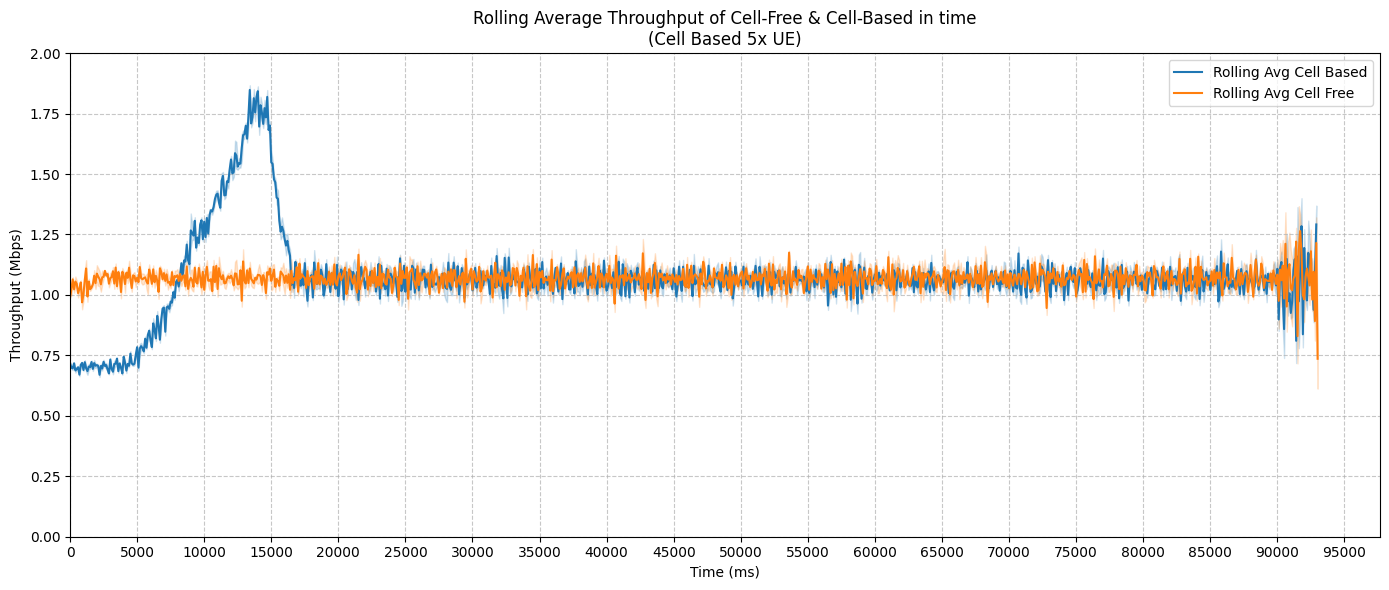

In [20]:
# Round of throughput values to 3 decimal places
df_cb_5["Mean_Throughput"] = df_cb_5["Mean_Throughput"].round(3)
# Calculate rolling average with a window of 5
df_cb_5["Rolling Avg (Mbps)"] = df_cb_5["Mean_Throughput"].rolling(window=5).mean()

# Round of throughput values to 3 decimal places
df_cf_5["Mean_Throughput"] = df_cf_5["Mean_Throughput"].round(3)
# Calculate rolling average with a window of 5
df_cf_5["Rolling Avg (Mbps)"] = df_cf_5["Mean_Throughput"].rolling(window=5).mean()

# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
sns.lineplot(x="Time_ms", y="Rolling Avg (Mbps)", data=df_cb_5, label="Rolling Avg Cell Based")
sns.lineplot(x="Time_ms", y="Rolling Avg (Mbps)", data=df_cf_5, label="Rolling Avg Cell Free")
plt.title("Rolling Average Throughput of Cell-Free & Cell-Based in time\n(Cell Based 5x UE)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.legend()

plt.grid(True)
plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 10X Scenarios

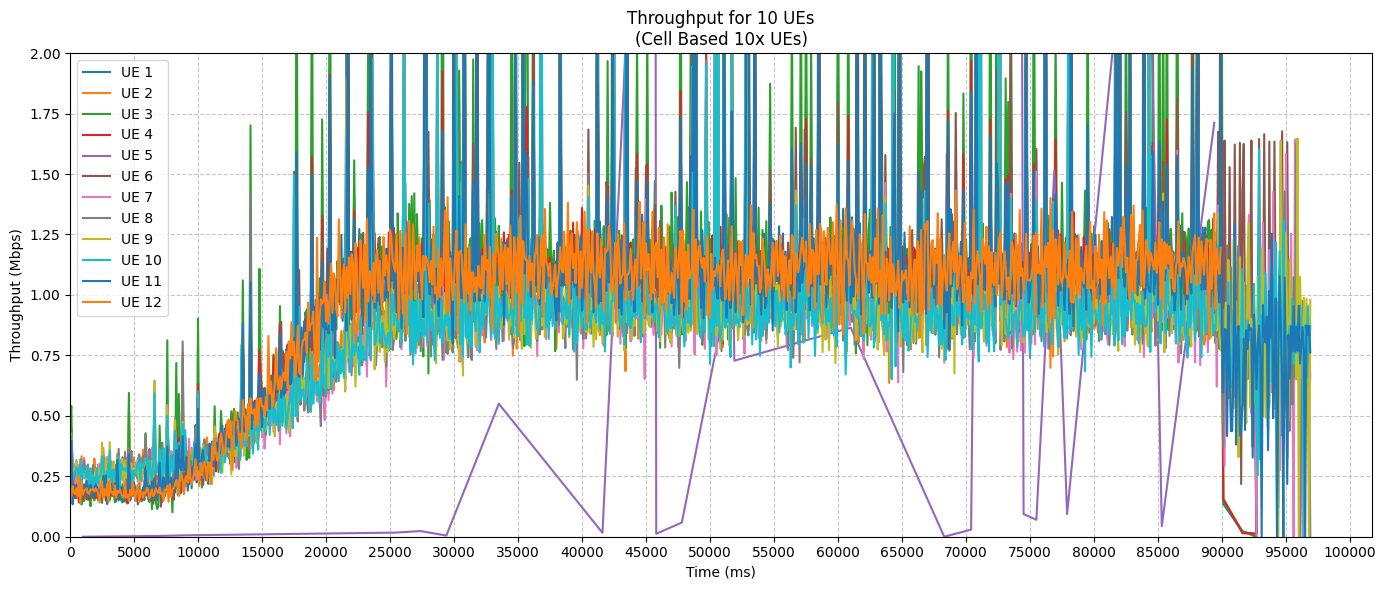

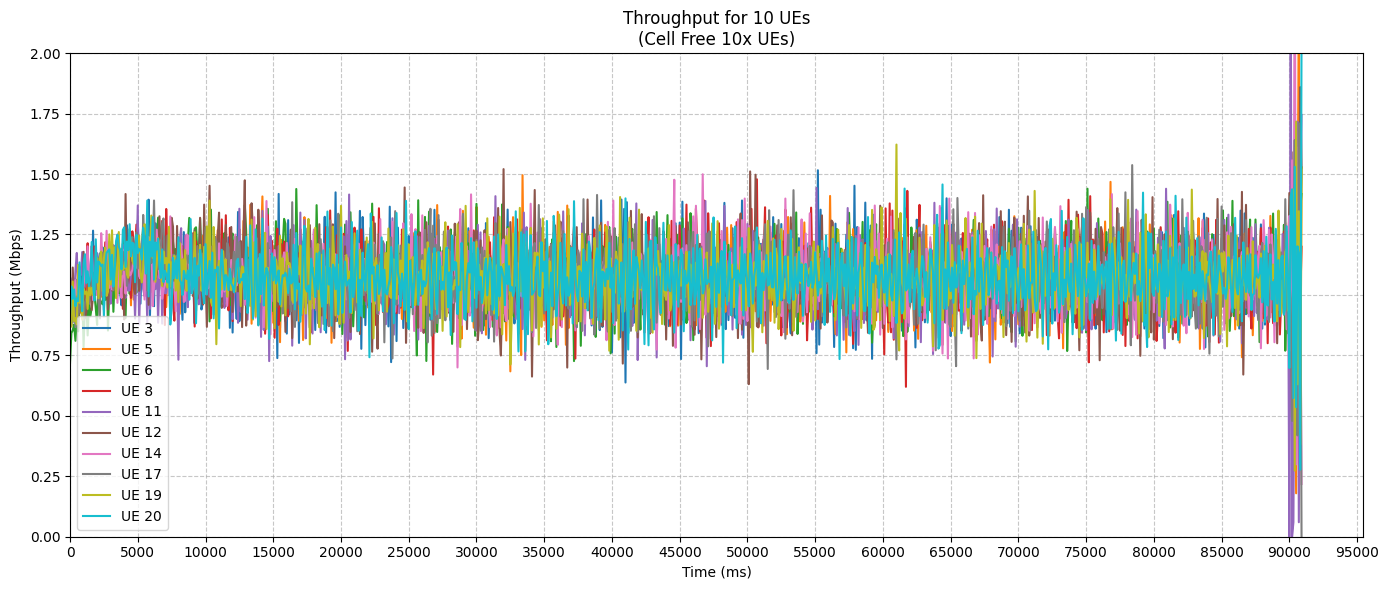

In [23]:
# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
for ue, df in dfs_cb_10.items():
    sns.lineplot(x="Time_ms", y="Mean_Throughput", data=df, label=f"UE {ue}")
plt.title("Throughput for 10 UEs\n(Cell Based 10x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.grid(True)
plt.legend()

plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
for ue, df in dfs_cf_10.items():
    sns.lineplot(x="Time_ms", y="Mean_Throughput", data=df, label=f"UE {ue}")
plt.title("Throughput for 10 UEs\n(Cell Free 10x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.grid(True)
plt.legend()

plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [24]:
df_cb_10 = pd.read_csv(cb_10x)
df_cf_10 = pd.read_csv(cf_10x)

print(df_cb_10["Mean_Throughput"].describe())
print(df_cf_10["Mean_Throughput"].describe())


count    10334.000000
mean         0.969914
std          0.603559
min          0.000000
25%          0.792531
50%          0.968837
75%          1.108778
max         16.888570
Name: Mean_Throughput, dtype: float64
count    9100.000000
mean        1.072843
std         0.136698
min         0.000000
25%         0.987553
50%         1.071210
75%         1.157609
max         2.623100
Name: Mean_Throughput, dtype: float64


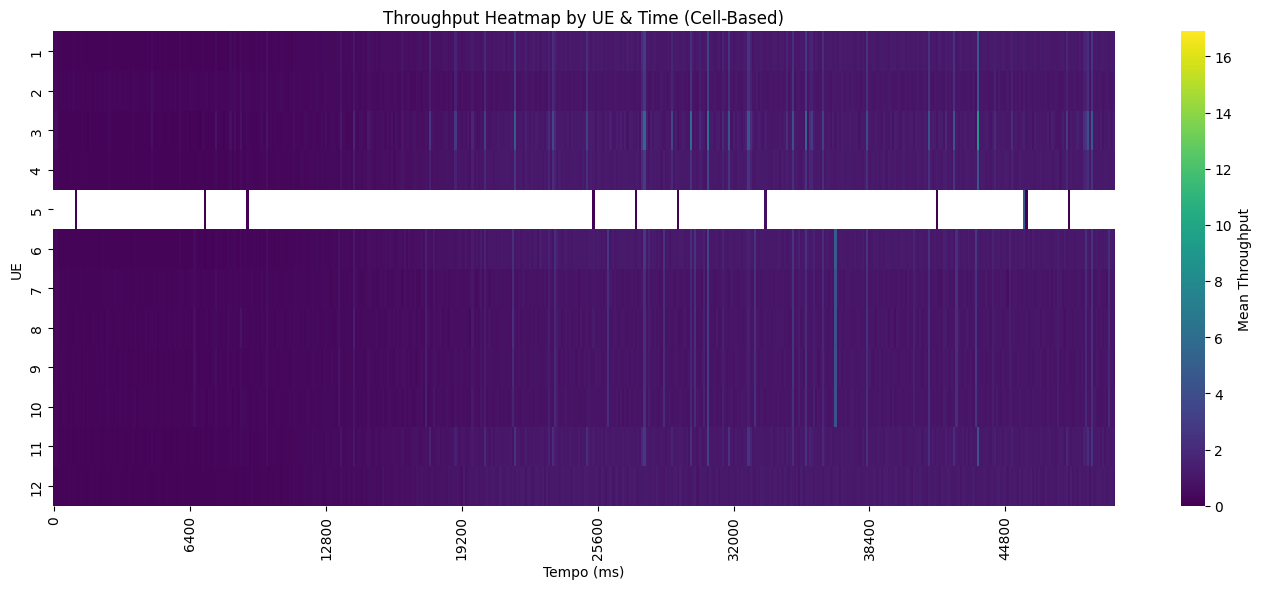

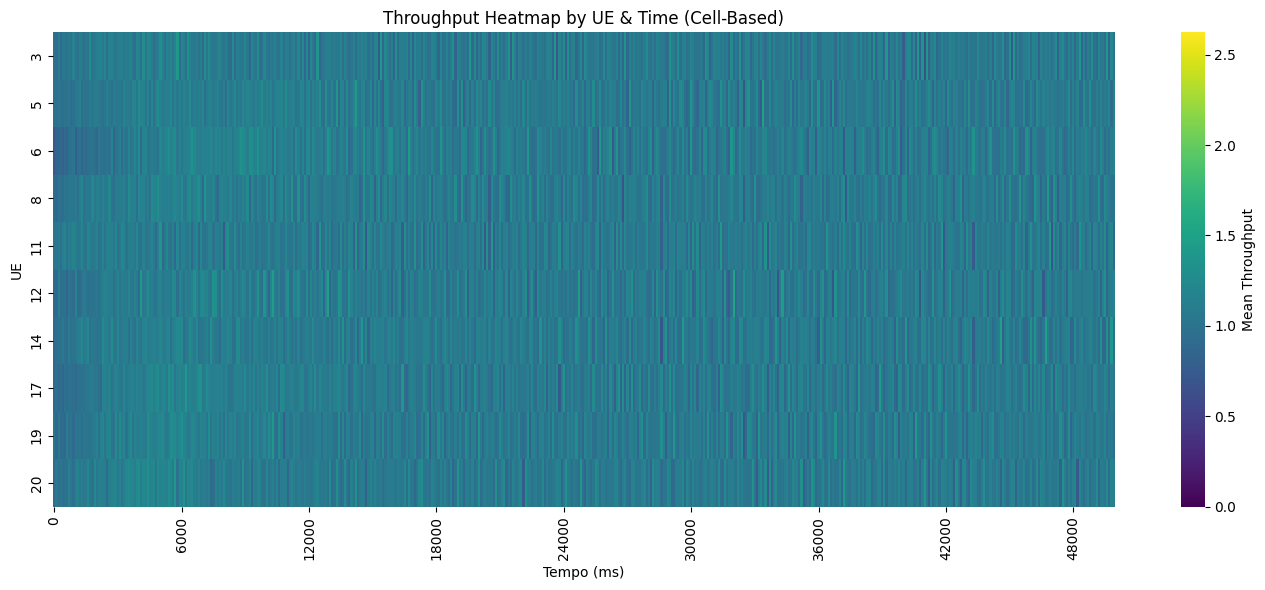

In [25]:

heat_cb = df_cb_10.pivot(index="UE_ID", columns="Time_ms", values="Mean_Throughput")
heat_cf = df_cf_10.pivot(index="UE_ID", columns="Time_ms", values="Mean_Throughput")

# Plot Cell-Based
plt.figure(figsize=(14, 6))
sns.heatmap(heat_cb, cmap="viridis", cbar_kws={'label': 'Mean Throughput'})
plt.title("Throughput Heatmap by UE & Time (Cell-Based)")
plt.xlabel("Tempo (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.tight_layout()
plt.xlim(0,500)
plt.show()

# Plot Cell-Free
plt.figure(figsize=(14, 6))
sns.heatmap(heat_cf, cmap="viridis", cbar_kws={'label': 'Mean Throughput'})
plt.title("Throughput Heatmap by UE & Time (Cell-Based)")
plt.xlabel("Tempo (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.xlim(0,500)
plt.tight_layout()
plt.show()

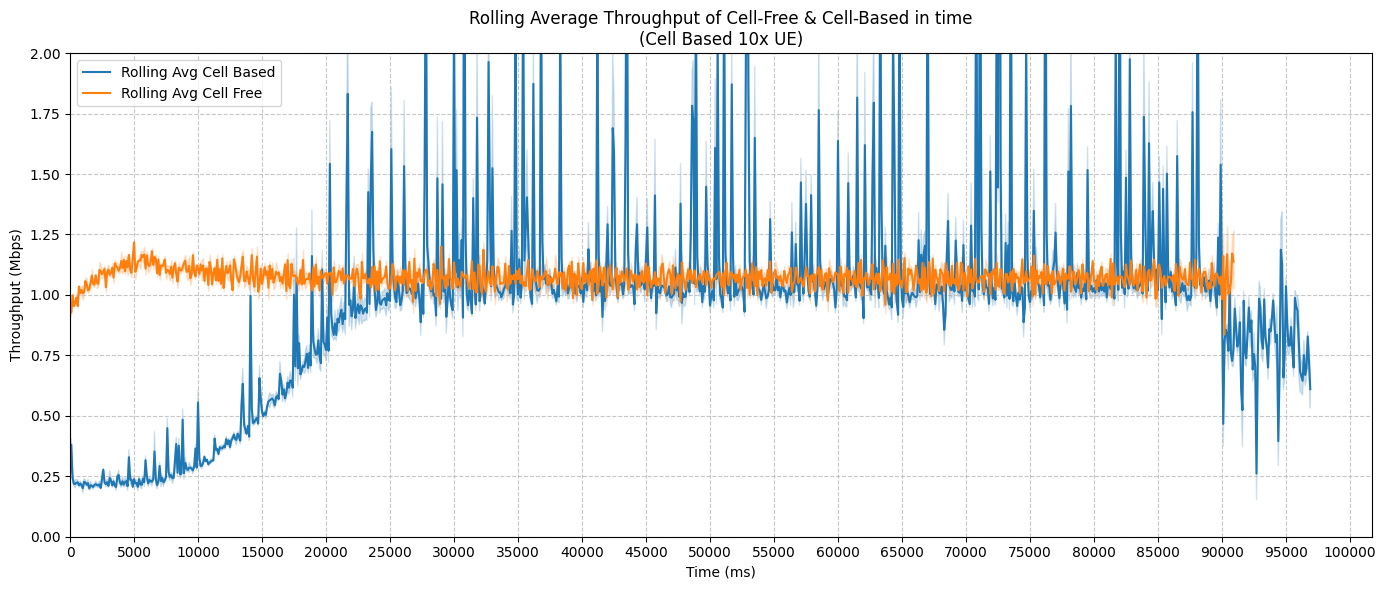

In [26]:
# Round of throughput values to 3 decimal places
df_cb_10["Mean_Throughput"] = df_cb_10["Mean_Throughput"].round(3)
# Calculate rolling average with a window of 5
df_cb_10["Rolling Avg (Mbps)"] = df_cb_10["Mean_Throughput"].rolling(window=5).mean()

# Round of throughput values to 3 decimal places
df_cf_10["Mean_Throughput"] = df_cf_10["Mean_Throughput"].round(3)
# Calculate rolling average with a window of 5
df_cf_10["Rolling Avg (Mbps)"] = df_cf_10["Mean_Throughput"].rolling(window=5).mean()

# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
sns.lineplot(x="Time_ms", y="Rolling Avg (Mbps)", data=df_cb_10, label="Rolling Avg Cell Based")
sns.lineplot(x="Time_ms", y="Rolling Avg (Mbps)", data=df_cf_10, label="Rolling Avg Cell Free")
plt.title("Rolling Average Throughput of Cell-Free & Cell-Based in time\n(Cell Based 10x UE)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.legend()

plt.grid(True)
plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# All Datasets

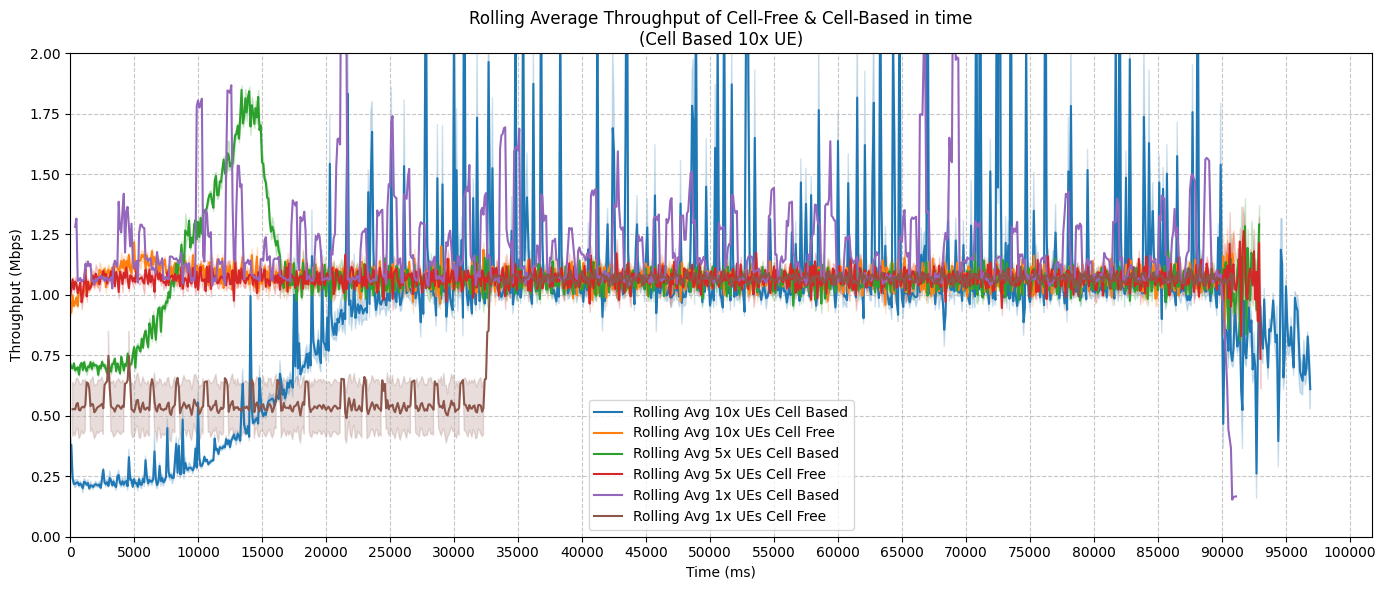

In [27]:
# Round of throughput values to 3 decimal places
df_cb_1["Mean_Throughput"] = df_cb_1["Mean_Throughput"].round(3)
df_cb_1["Rolling Avg (Mbps)"] = df_cb_1["Mean_Throughput"].rolling(window=5).mean()
df_cf_1["Mean_Throughput"] = df_cf_1["Mean_Throughput"].round(3)
df_cf_1["Rolling Avg (Mbps)"] = df_cf_1["Mean_Throughput"].rolling(window=5).mean()

# Round of throughput values to 3 decimal places
df_cb_5["Mean_Throughput"] = df_cb_5["Mean_Throughput"].round(3)
df_cb_5["Rolling Avg (Mbps)"] = df_cb_5["Mean_Throughput"].rolling(window=5).mean()
df_cf_5["Mean_Throughput"] = df_cf_5["Mean_Throughput"].round(3)
df_cf_5["Rolling Avg (Mbps)"] = df_cf_5["Mean_Throughput"].rolling(window=5).mean()

# Round of throughput values to 3 decimal places
df_cb_10["Mean_Throughput"] = df_cb_10["Mean_Throughput"].round(3)
df_cb_10["Rolling Avg (Mbps)"] = df_cb_10["Mean_Throughput"].rolling(window=5).mean()
df_cf_10["Mean_Throughput"] = df_cf_10["Mean_Throughput"].round(3)
df_cf_10["Rolling Avg (Mbps)"] = df_cf_10["Mean_Throughput"].rolling(window=5).mean()

# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
sns.lineplot(x="Time_ms", y="Rolling Avg (Mbps)", data=df_cb_10, label="Rolling Avg 10x UEs Cell Based")
sns.lineplot(x="Time_ms", y="Rolling Avg (Mbps)", data=df_cf_10, label="Rolling Avg 10x UEs Cell Free")
sns.lineplot(x="Time_ms", y="Rolling Avg (Mbps)", data=df_cb_5, label="Rolling Avg 5x UEs Cell Based")
sns.lineplot(x="Time_ms", y="Rolling Avg (Mbps)", data=df_cf_5, label="Rolling Avg 5x UEs Cell Free")
sns.lineplot(x="Time_ms", y="Rolling Avg (Mbps)", data=df_cb_1, label="Rolling Avg 1x UEs Cell Based")
sns.lineplot(x="Time_ms", y="Rolling Avg (Mbps)", data=df_cf_1, label="Rolling Avg 1x UEs Cell Free")
plt.title("Rolling Average Throughput of Cell-Free & Cell-Based in time\n(Cell Based 10x UE)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.legend()

plt.grid(True)
plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Stats

## Mean Throughput (Mbps)

| Métrica      | CB (1x UEs) | CF (1x UEs) | CB (5x UEs) | CF (5x UEs) | CB (10x UEs) | CF (10x UEs) |
|--------------|-----------|-----------|-------------|-------------|--------------|--------------|
| Count        | 907       | 1215      | 4650        | 4655        | 10334        | 9100         |
| Mean         | 1.191     | 0.799     | 1.070       | 1.068       | 0.970        | 1.073        |
| Std          | 0.445     | 0.469     | 0.234       | 0.128       | 0.604        | 0.137        |
| Min          | 0.000     | 0.000     | 0.391       | 0.000       | 0.000        | 0.000        |
| 25%          | 1.036     | 0.000     | 0.982       | 0.998       | 0.793        | 0.988        |
| 50% (Median) | 1.073     | 1.039     | 1.061       | 1.066       | 0.969        | 1.071        |
| 75%          | 1.129     | 1.099     | 1.139       | 1.137       | 1.109        | 1.158        |
| Max          | 5.880     | 1.401     | 2.586       | 2.154       | 16.889       | 2.623        |


## Requirements

|                | VM RAN    | VM CN     | VM UEs      |  VM FlexRIC | 
|--------------  |-----------|-----------|-------------|-------------|
| CPU            | 12        | 2         | 14          | 4           | 
| RAM (GiB)      | 24        | 2         | 20          | 6           | 
| Storage  (GiB) | 76        | 25        | 50          | 50          | 
